#### Arbitrary Value Imputation

* This technique was derived from kaggle competition
* It consists of replacing NAN by an arbitrary value

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan(df, variable):
    df[variable +'_zero'] = df[variable].fillna(0)
    df[variable +'_hundred'] = df[variable].fillna(100)
    

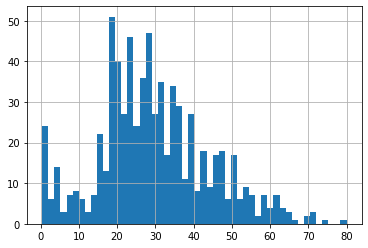

In [2]:
df['Age'].hist(bins = 50)

### Arbitrary values
#### 1. It should not be more frequently present

### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

If the value is outside the distribution it may mask or create outliers

##### How to handle categorical Missing Values

##### Frequent Category Imputation

In [6]:
df = pd.read_csv('loan.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [7]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
df.shape

(1460, 4)

In [8]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [10]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [11]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

In [17]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [13]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

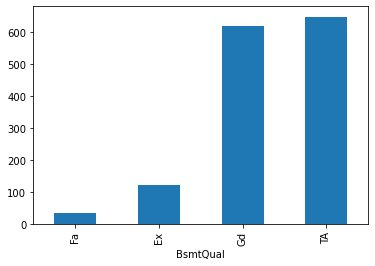

In [15]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = True).plot.bar()

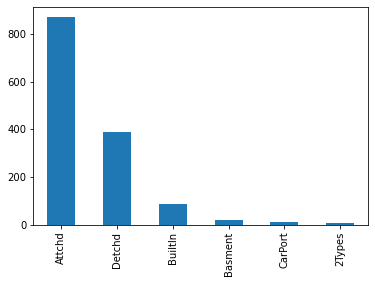

In [18]:
df['GarageType'].value_counts().plot.bar()

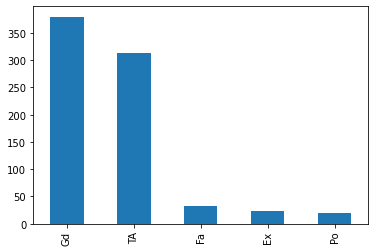

In [19]:
df['FireplaceQu'].value_counts().plot.bar()

In [22]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [23]:
df['GarageType'].value_counts()[0]

870

In [24]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [31]:
df['GarageType'].mode()[0]

'Attchd'

In [25]:
#### Replacingfunction
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace = True)

In [27]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [28]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages
1. Easy to implement
2. Faster way to implement

#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over repesented way, if there are many NANs
2. It distorts the relationship of the most frequent label

##### Adding a variable to capture NAN

In [38]:
df = pd.read_csv('loan.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [39]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [40]:
import numpy as np
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(), 1, 0)

In [41]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [42]:
frequent = df['BsmtQual'].mode()[0]

In [44]:
df['BsmtQual'].fillna(frequent, inplace = True)

In [47]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [48]:
# Finding the importance of feature by creating a new feature
df['FireplaceQu_Var'] = np.where(df['FireplaceQu'].isnull(), 1, 0)
# Find Most frequent category for replacing NAN
frequent = df['FireplaceQu'].mode()[0]
# Replacing with the most frequent category
df['FireplaceQu'].fillna(frequent, inplace = True)

In [49]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [50]:
df = pd.read_csv('loan.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [51]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [52]:
def impute_nan(df, variable):
    df[variable +'_newvar'] = np.where(df[variable].isnull(), 'Missing', df[variable])

In [53]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [54]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


### Now we can drop the 'BsmtQual', 'FireplaceQu', 'GarageType' feature as they are not required and use the new features

In [56]:
df = df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'], axis = 1)

In [57]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
